In [1]:
import pandas as pd
import numpy as np
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings  
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv("C:/Users/Arjun/Downloads/Hotel Bookings.csv")

In [3]:
dataset.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
dataset.shape

(119390, 32)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### Checking duplicates

In [6]:
#duplicate
len(dataset[dataset.duplicated()])

31994

In [7]:
dataset.drop_duplicates(inplace=True)

In [8]:
dataset.shape

(87396, 32)

In [9]:
dataset['arrival_date'] = dataset['arrival_date_year'].astype(str) + '/' + dataset['arrival_date_month'] + '/' + dataset['arrival_date_day_of_month'].astype(str)

In [10]:
dataset.drop(['arrival_date_year', 'arrival_date_day_of_month'], axis=1, inplace=True)

In [11]:
dataset['arrival_date'] = dataset['arrival_date'].apply(pd.to_datetime)

In [12]:
dataset.head()

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
0,Resort Hotel,0,342,July,27,0,0,2,0.0,0,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01
1,Resort Hotel,0,737,July,27,0,0,2,0.0,0,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01
2,Resort Hotel,0,7,July,27,0,1,1,0.0,0,...,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01
3,Resort Hotel,0,13,July,27,0,1,1,0.0,0,...,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01
4,Resort Hotel,0,14,July,27,0,2,2,0.0,0,...,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01


In [13]:
dataset['adr'].value_counts()

0.00      1778
75.00     1320
65.00     1260
48.00      878
85.00      858
          ... 
131.51       1
27.43        1
135.83       1
98.57        1
97.21        1
Name: adr, Length: 8879, dtype: int64

In [14]:
dataset[(dataset['adr']==0.00)&(dataset['hotel']=='Resort Hotel')&(dataset['arrival_date']=='2015/July/1')].iloc[:,0:30]

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,July,27,0,0,2,0.0,0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,July,27,0,0,2,0.0,0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01


In [15]:
dataset.drop(['lead_time', 'booking_changes'], axis=1, inplace=True)

In [16]:
dataset.drop_duplicates(inplace=True)

In [17]:
dataset.shape

(85859, 29)

### Checking for null values

In [18]:
null_perc = ((dataset.isnull().sum()) * 100)/len(dataset)
null_perc

hotel                              0.000000
is_canceled                        0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.004659
babies                             0.000000
meal                               0.000000
country                            0.526445
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
deposit_type                       0.000000
agent                             13.821498
company                           94.072840
days_in_waiting_list               0.000000
customer_type                   

#### Dropping company column which have 94% null value 

In [19]:
dataset.drop(['company'], axis=1, inplace=True)

In [20]:
dataset.head()

,hotel,is_canceled,arrival_date_month,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
0,Resort Hotel,0,July,27,0,0,2,0.0,0,BB,...,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01
2,Resort Hotel,0,July,27,0,1,1,0.0,0,BB,...,No Deposit,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01
3,Resort Hotel,0,July,27,0,1,1,0.0,0,BB,...,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01
4,Resort Hotel,0,July,27,0,2,2,0.0,0,BB,...,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01
6,Resort Hotel,0,July,27,0,2,2,0.0,0,BB,...,No Deposit,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03,2015-07-01


In [21]:
dataset['agent'].value_counts()

9.0      28487
240.0    12912
14.0      3327
7.0       3279
250.0     2770
         ...  
299.0        1
446.0        1
247.0        1
304.0        1
450.0        1
Name: agent, Length: 333, dtype: int64

#### Filling null value

In [22]:

dataset['agent'].fillna(value=dataset['agent'].mean(),inplace=True)

In [23]:
dataset['country'].head(10)

0     PRT
2     GBR
3     GBR
4     GBR
6     PRT
7     PRT
8     PRT
9     PRT
10    PRT
11    PRT
Name: country, dtype: object

In [24]:
dataset = dataset.dropna()

In [25]:
dataset.isnull().sum()

hotel                             0
is_canceled                       0
arrival_date_month                0
arrival_date_week_number          0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status                0
reservation_status_date           0
arrival_date                

In [26]:
dataset.head()

,hotel,is_canceled,arrival_date_month,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
0,Resort Hotel,0,July,27,0,0,2,0.0,0,BB,...,No Deposit,93.985404,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01
2,Resort Hotel,0,July,27,0,1,1,0.0,0,BB,...,No Deposit,93.985404,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01
3,Resort Hotel,0,July,27,0,1,1,0.0,0,BB,...,No Deposit,304.000000,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01
4,Resort Hotel,0,July,27,0,2,2,0.0,0,BB,...,No Deposit,240.000000,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01
6,Resort Hotel,0,July,27,0,2,2,0.0,0,BB,...,No Deposit,93.985404,0,Transient,107.0,0,0,Check-Out,2015-07-03,2015-07-01


### Distribution of hotel bookings and separate them by their cancellation status.

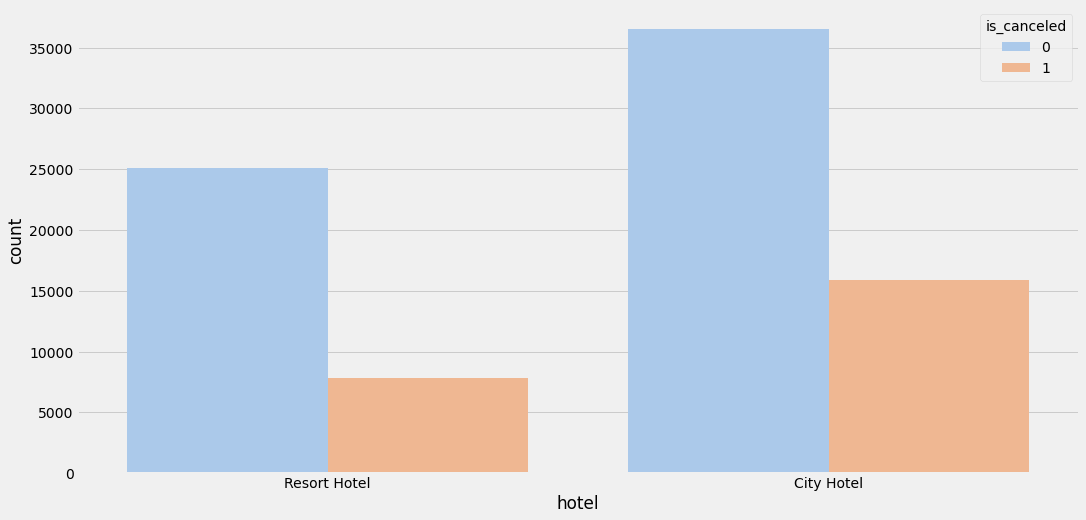

In [27]:
plt.figure(figsize=(16, 8))
sns.countplot(x='hotel', data= dataset, hue='is_canceled', palette='pastel')
plt.show()

In [28]:
dataset['deposit_type'].value_counts()

No Deposit    84298
Non Refund     1003
Refundable      102
Name: deposit_type, dtype: int64

### Deposit type vs Cancellation status 

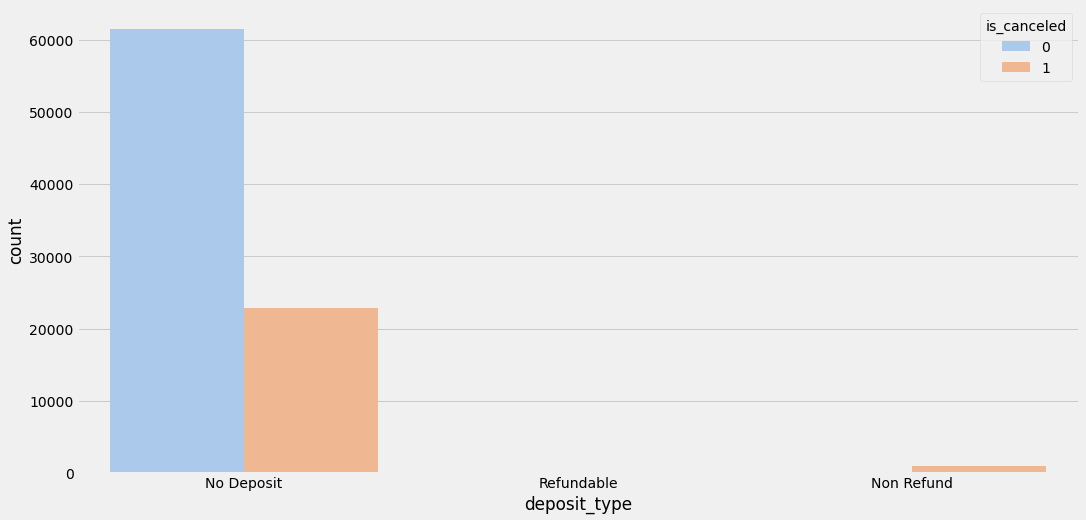

In [29]:
plt.figure(figsize=(16, 8))
sns.countplot(x='deposit_type', data=dataset, hue='is_canceled', palette='pastel')
plt.show()

In [30]:
dataset['reservation_status_date'] = dataset['reservation_status_date'].apply(pd.to_datetime)

In [31]:
#check cancelation 
cancellation = dataset[dataset['reservation_status'] == 'Canceled']
cancellation['cancel_to_arrival_day'] = cancellation['arrival_date'] - cancellation['reservation_status_date']
cancellation['cancel_to_arrival_day'] = cancellation['cancel_to_arrival_day'].dt.days


### visualization of day from cancellation to arrival

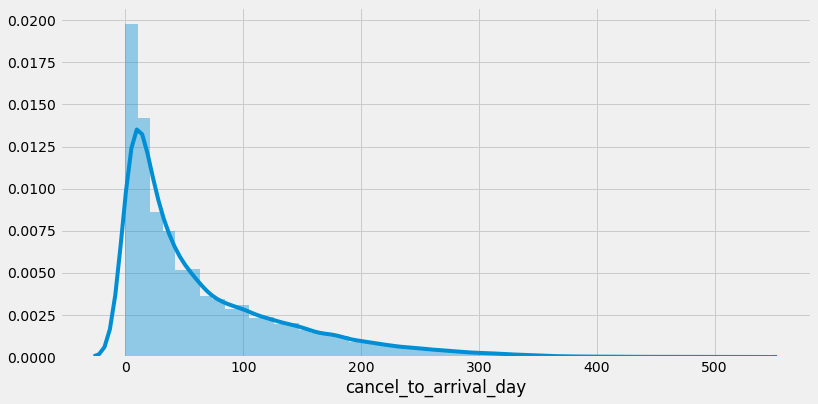

In [32]:
plt.figure(figsize=(12, 6))
sns.distplot(cancellation['cancel_to_arrival_day'])
plt.show()

In [33]:
#cancellation less than a week to arrival day
cancel_less_a_week = (cancellation[cancellation['cancel_to_arrival_day'] <= 7]['cancel_to_arrival_day'].count()*100/
                      cancellation['cancel_to_arrival_day'].count()).round(2)

In [34]:
print('Percentage of cancellations that are within a week = ', cancel_less_a_week , '%')

Percentage of cancellations that are within a week =  16.17 %


### checking in which month we have highest booking.

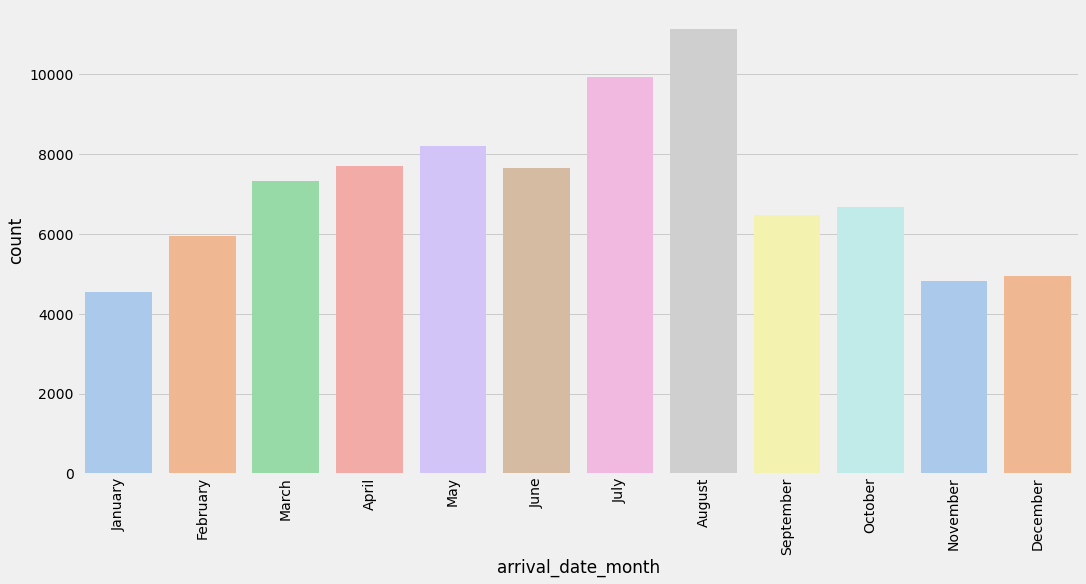

In [35]:
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
         'September', 'October', 'November', 'December']
plt.figure(figsize=(16, 8))
sns.countplot(dataset['arrival_date_month'], palette='pastel', order=month)
plt.xticks(rotation=90)
plt.show()

In [36]:
dataset['is_canceled'].value_counts()

0    61620
1    23783
Name: is_canceled, dtype: int64

In [37]:
#mounthly cancellation
monthly_cancellation_per = pd.DataFrame(dataset[dataset['is_canceled']==1]['arrival_date_month'].value_counts()*100/
                        dataset['arrival_date_month'].value_counts())
monthly_cancellation_per.reset_index()



,index,arrival_date_month
0,April,30.951763
1,August,32.288204
2,December,27.347844
3,February,23.637281
4,January,22.606207
5,July,31.938437
6,June,30.553013
7,March,24.744097
8,May,29.502803
9,November,21.650767


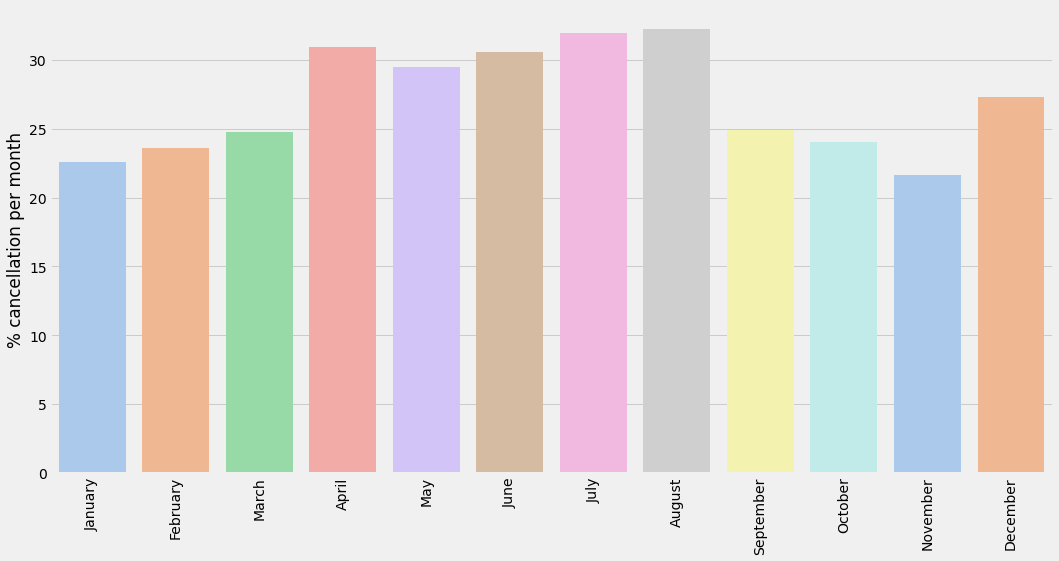

In [38]:
plt.figure(figsize=(16, 8))
sns.barplot(x=monthly_cancellation_per.index, y= 'arrival_date_month',
            data=monthly_cancellation_per, order=month, palette='pastel')
plt.xticks(rotation=90)
plt.ylabel('% cancellation per month')
plt.show()

In [39]:
dataset['market_segment'].value_counts()

Online TA        51108
Offline TA/TO    13409
Direct           11540
Groups            4515
Corporate         3918
Complementary      689
Aviation           224
Name: market_segment, dtype: int64

### Cancellation and market segment(Different booking method)

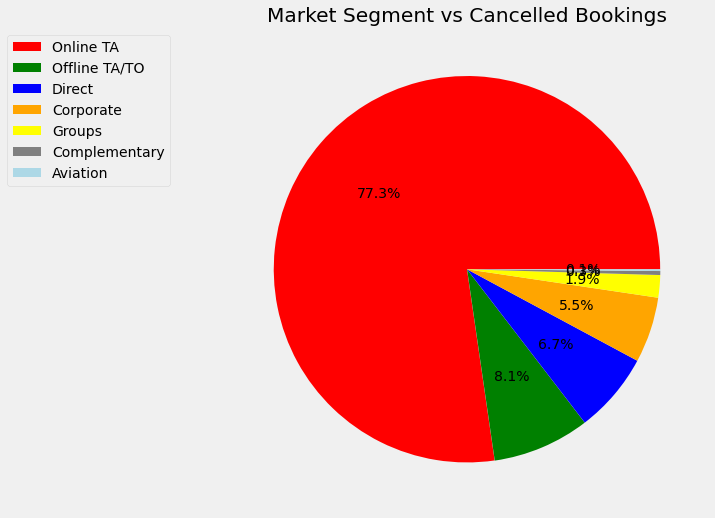

In [40]:

plt.figure(figsize=(10, 10))
segment = [.0005] * len(cancellation['market_segment'].unique())
colors = ['red', 'green', 'blue', 'orange', 'yellow', 'gray', 'lightblue']
plt.pie(cancellation['market_segment'].value_counts(), autopct= '%.1f%%', explode = segment, colors = colors )
plt.legend(cancellation['market_segment'].unique(), bbox_to_anchor=(-0.1, 1.0), fontsize=14)
plt.title('Market Segment vs Cancelled Bookings')
plt.tight_layout()
plt.show()


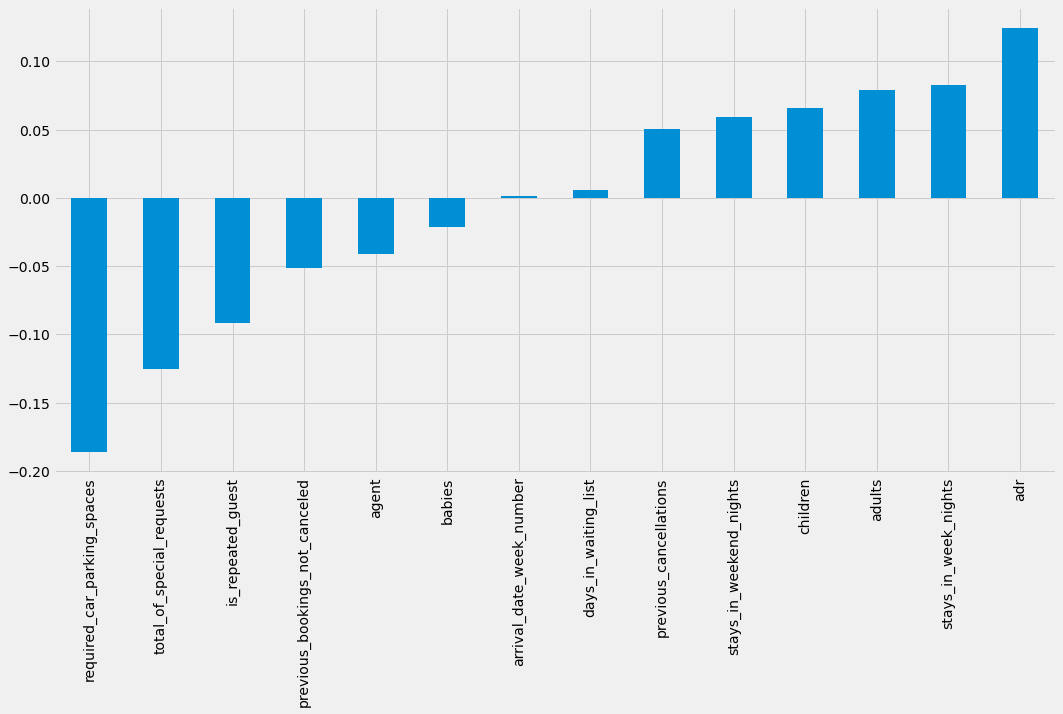

In [41]:
#Correlation
plt.figure(figsize=(16, 8))
dataset.corr()['is_canceled'].sort_values()[:-1].plot(kind='bar')
plt.show()

In [42]:
dataset['meal'].value_counts()

BB           66408
SC            9382
HB            8827
Undefined      433
FB             353
Name: meal, dtype: int64

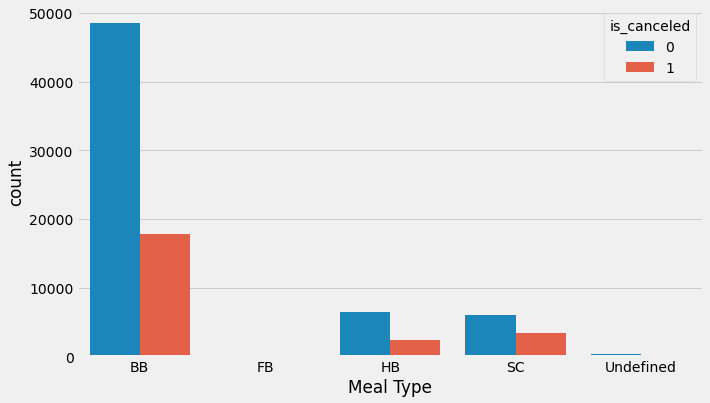

In [43]:
plt.figure(figsize=(10, 6))
sns.countplot(dataset['meal'], hue=dataset['is_canceled'])
plt.xlabel('Meal Type')
plt.show()

In [44]:
dataset['customer_type'].value_counts()

Transient          70843
Transient-Party    10923
Contract            3105
Group                532
Name: customer_type, dtype: int64

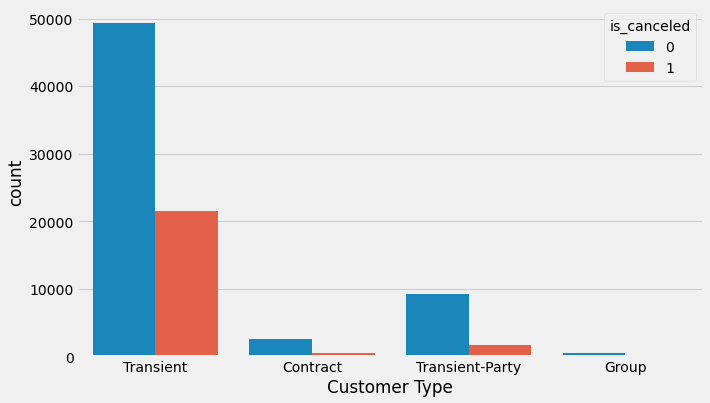

In [45]:
plt.figure(figsize=(10, 6))
sns.countplot(dataset['customer_type'], hue=dataset['is_canceled'])
plt.xlabel('Customer Type')
plt.show()

In [46]:
dataset['reserved_room_type'].value_counts()

A    54902
D    17204
E     5981
F     2811
G     2035
B      958
C      910
H      595
L        6
P        1
Name: reserved_room_type, dtype: int64

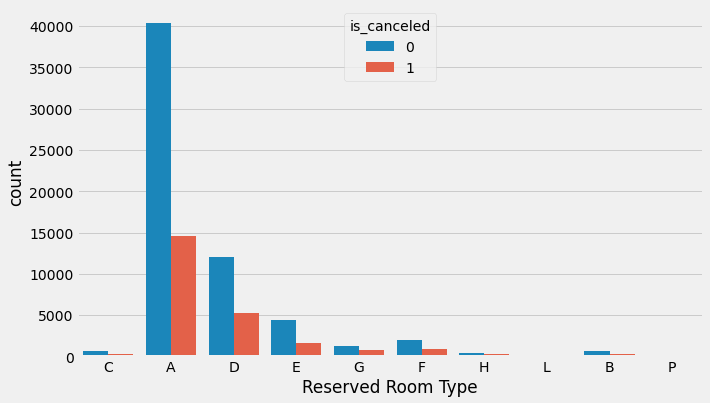

In [47]:
plt.figure(figsize=(10, 6))
sns.countplot(dataset['reserved_room_type'], hue=dataset['is_canceled'])
plt.xlabel('Reserved Room Type')
plt.show()

In [48]:
dataset['assigned_room_type'].value_counts()

A    45141
D    21905
E     7078
F     3596
G     2477
C     2118
B     1766
H      700
I      348
K      272
L        1
P        1
Name: assigned_room_type, dtype: int64

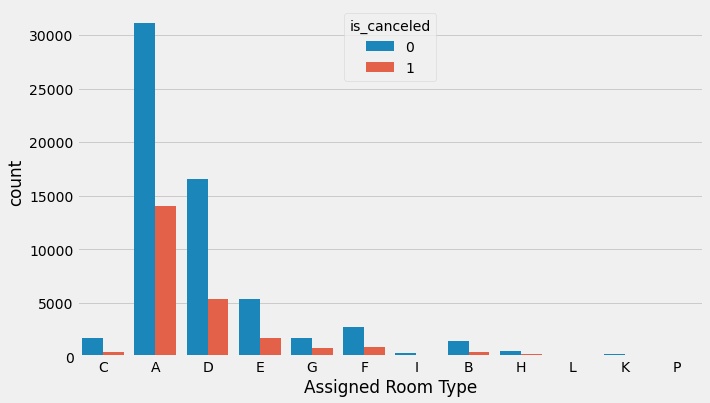

In [49]:
plt.figure(figsize=(10, 6))
sns.countplot(dataset['assigned_room_type'], hue = dataset['is_canceled'])
plt.xlabel('Assigned Room Type')
plt.show()

In [50]:
dataset['reservation_status'].value_counts()

Check-Out    61620
Canceled     22782
No-Show       1001
Name: reservation_status, dtype: int64

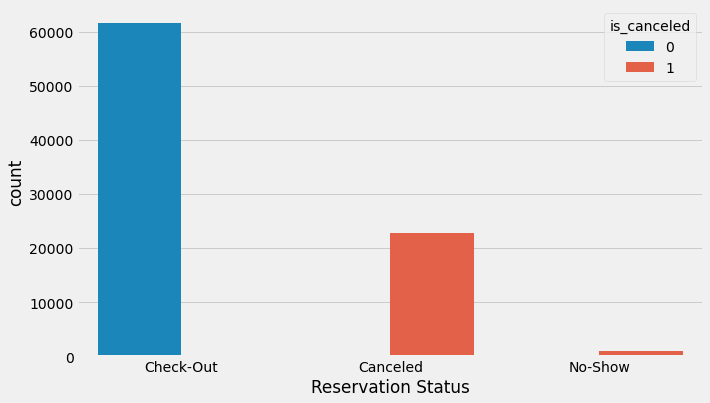

In [51]:
plt.figure(figsize=(10, 6))
sns.countplot(dataset['reservation_status'], hue=dataset['is_canceled'])
plt.xlabel('Reservation Status')
plt.show()

### Converting categorical data

In [52]:
dataset.drop(columns=['meal', 'country', 'reserved_room_type', 'assigned_room_type', 'deposit_type',
                    'reservation_status', 'reservation_status_date', 'arrival_date'], axis=1, inplace=True)

In [53]:
dataset = pd.concat([dataset, 
                 pd.get_dummies(dataset['hotel'], drop_first=True), 
                 pd.get_dummies(dataset['arrival_date_month'], drop_first=True), 
                 pd.get_dummies(dataset['market_segment'], drop_first=True),
                 pd.get_dummies(dataset['distribution_channel'], drop_first=True),
                 pd.get_dummies(dataset['customer_type'], drop_first=True)
                 ], axis=1)

In [54]:
dataset.drop(columns=['hotel', 'arrival_date_month', 'market_segment', 'distribution_channel', 'customer_type'],
             axis=1, inplace=True)

In [55]:
dataset.shape

(85403, 40)

In [56]:
dataset.columns

Index(['is_canceled', 'arrival_date_week_number', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'agent', 'days_in_waiting_list',
       'adr', 'required_car_parking_spaces', 'total_of_special_requests',
       'Resort Hotel', 'August', 'December', 'February', 'January', 'July',
       'June', 'March', 'May', 'November', 'October', 'September',
       'Complementary', 'Corporate', 'Direct', 'Groups', 'Offline TA/TO',
       'Online TA', 'Direct', 'GDS', 'TA/TO', 'Undefined', 'Group',
       'Transient', 'Transient-Party'],
      dtype='object')

In [57]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85403 entries, 0 to 119389
Data columns (total 40 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     85403 non-null  int64  
 1   arrival_date_week_number        85403 non-null  int64  
 2   stays_in_weekend_nights         85403 non-null  int64  
 3   stays_in_week_nights            85403 non-null  int64  
 4   adults                          85403 non-null  int64  
 5   children                        85403 non-null  float64
 6   babies                          85403 non-null  int64  
 7   is_repeated_guest               85403 non-null  int64  
 8   previous_cancellations          85403 non-null  int64  
 9   previous_bookings_not_canceled  85403 non-null  int64  
 10  agent                           85403 non-null  float64
 11  days_in_waiting_list            85403 non-null  int64  
 12  adr                            

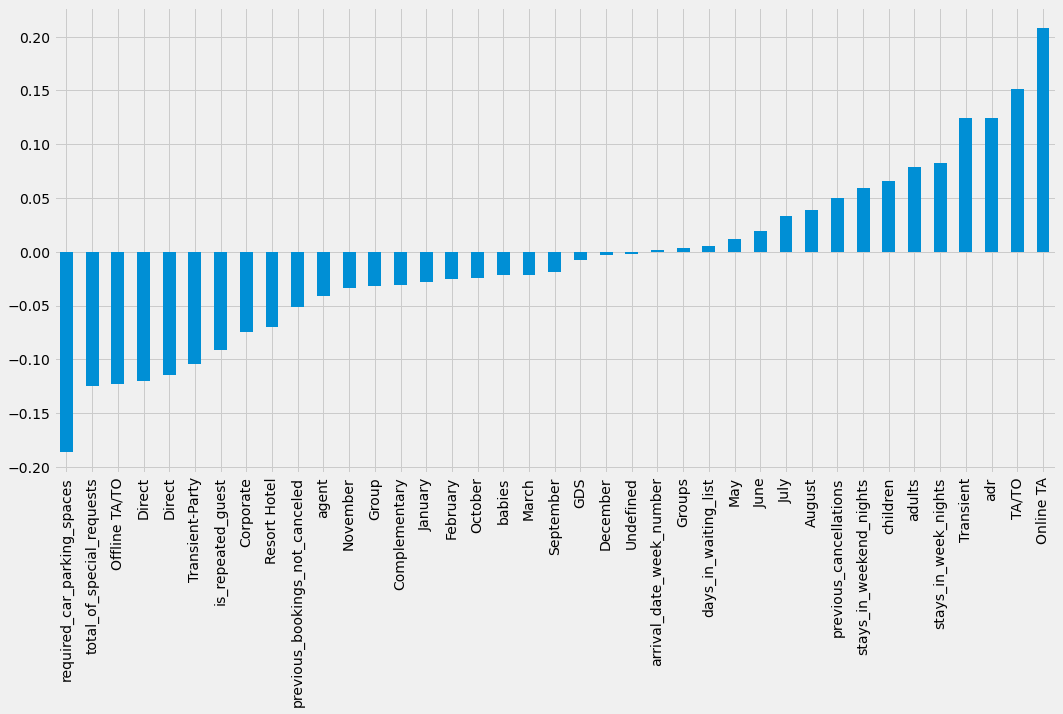

In [58]:
plt.figure(figsize=(16,8))
dataset.corr()['is_canceled'].sort_values()[:-1].plot(kind='bar')
plt.show()